In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils import face_utils
import argparse
import imutils
import dlib
%matplotlib inline

In [54]:
###IMPORT IMAGE###

def load_img():
    img = cv2.imread('images/face2.jpg',0)
    return img

In [55]:
###CONVENIENCE FUNCTION FOR DISPLAYING IMAGE###

def display_img(img,cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [56]:
###location and size of ROI
x_roi = 0
y_roi = 0
w_roi = 0
h_roi = 0
pts_outer = []
pts_inner = []

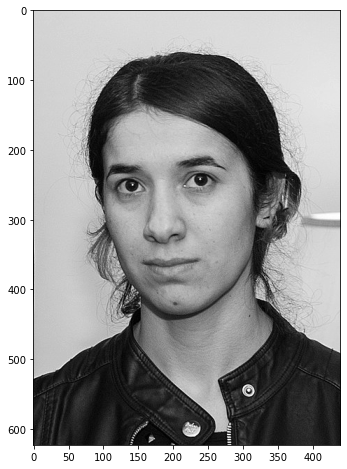

In [57]:
face = load_img()
display_img(face)

In [58]:
### 2-D BLUR ###

kernel = np.ones(shape=(1,1),dtype=np.float32)/25
kernel

array([[0.04]], dtype=float32)

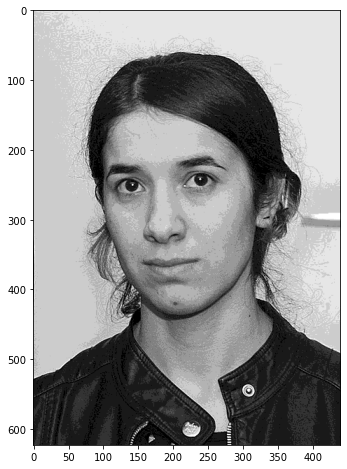

In [59]:
blurred = cv2.filter2D(face,-1,kernel)
display_img(blurred)

In [60]:
blurred.shape

(623, 440)

In [61]:
hist_values = cv2.calcHist([blurred],channels=[0],mask=None,histSize=[256],ranges=[0,256])

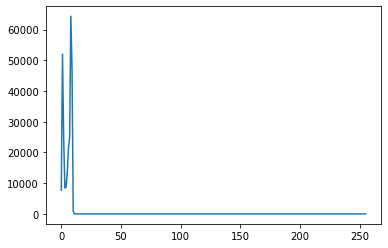

In [62]:
plt.plot(hist_values)

In [63]:
eq_blurred = cv2.equalizeHist(blurred)

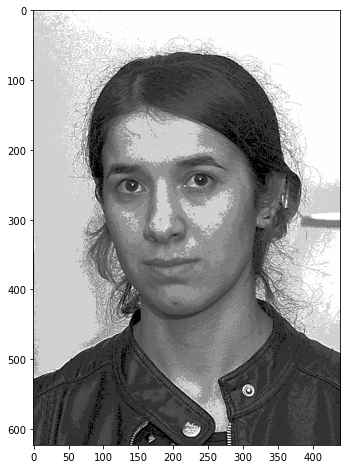

In [64]:
display_img(eq_blurred,cmap='gray')

In [65]:
eq_hist_values = cv2.calcHist([eq_blurred],channels=[0],mask=None,histSize=[256],ranges=[0,256])

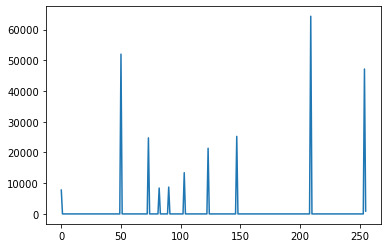

In [66]:
plt.plot(eq_hist_values)

In [67]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [68]:
def detect_face(img):
    global x_roi,y_roi,w_roi,h_roi
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        x_roi = x
        y_roi = y
        w_roi = w
        h_roi = h
        
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,127),10)
        
    return face_img

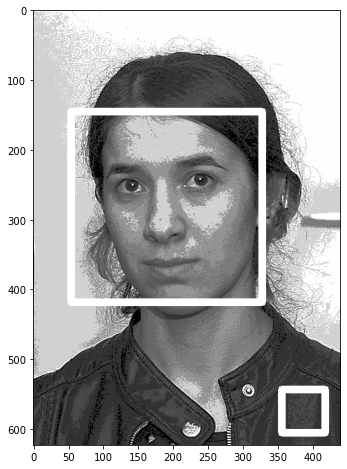

In [69]:
face_detected = detect_face(eq_blurred)
display_img(face_detected)

In [70]:
### Histogram Equalization proves to be effective for those images which have more pixel value representations ###
# since our objective is to find boundaries of the lips accurately, it is important for us to use effective increasing of contrast.

In [75]:
face_color = cv2.imread("images/face2.jpg")
face_color = cv2.cvtColor(face_color,cv2.COLOR_BGR2RGB)

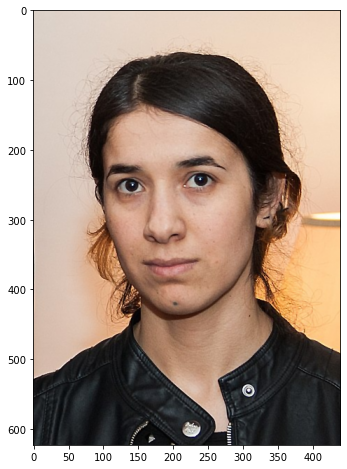

In [76]:
blurred_2 = cv2.bilateralFilter(face_color,2,75,75)
display_img(blurred_2)

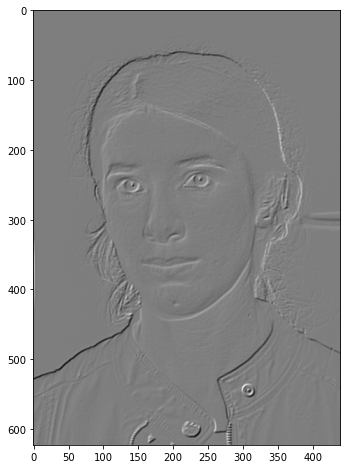

In [77]:
for_sobel = cv2.cvtColor(blurred_2,cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(for_sobel,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(for_sobel,cv2.CV_64F,0,1,ksize=5)
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)
display_img(blended,cmap='gray')

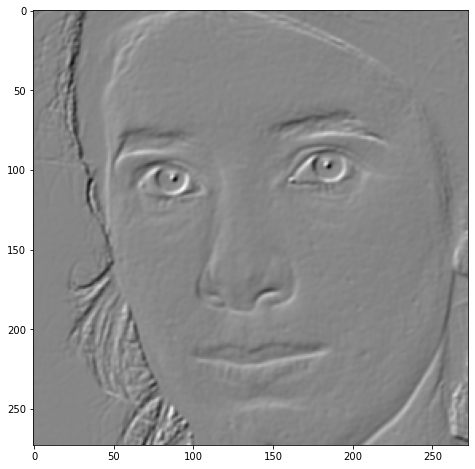

In [78]:
ROI_BW = blended[y_roi:y_roi+h_roi,x_roi:x_roi+w_roi]
ROI = blurred_2[y_roi:y_roi+h_roi,x_roi:x_roi+w_roi]
ROI_gray = cv2.cvtColor(ROI,cv2.COLOR_RGB2GRAY)
display_img(ROI_BW)

In [79]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

[(144, 350)]
[(144, 350), (170, 338)]
[(144, 350), (170, 338), (180, 339)]
[(144, 350), (170, 338), (180, 339), (191, 337)]
[(144, 350), (170, 338), (180, 339), (191, 337), (220, 347)]
[(144, 350), (170, 338), (180, 339), (191, 337), (220, 347), (192, 350)]
[(144, 350), (170, 338), (180, 339), (191, 337), (220, 347), (192, 350), (181, 352)]
[(144, 350), (170, 338), (180, 339), (191, 337), (220, 347), (192, 350), (181, 352), (171, 351)]


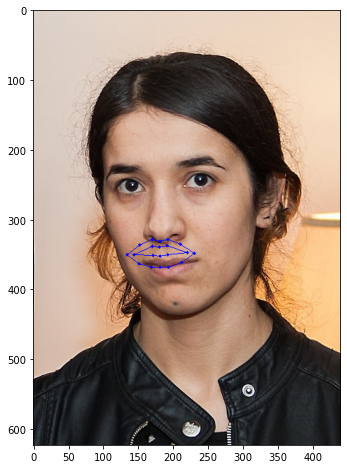

In [80]:
faces = detector(blurred_2)
for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()

    landmarks = predictor(ROI_gray,face)

    for i in range(60,68): 
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        t = (x,y)
        pts_inner.append(t)
        cv2.circle(blurred_2,(x,y),2,(0,0,255),-1)
        print(pts_inner)
       
    pts_inner = np.array(pts_inner,np.int32)
    pts_inner.reshape((-1,1,2))
    cv2.polylines(blurred_2,[pts_inner],True,(0,0,255),1)    
    pts_inner = []
    
    for i in range(48,60): 
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        t = (x,y)
        pts_outer.append(t)
        cv2.circle(blurred_2,(x,y),2,(0,0,255),-1)
       
    pts_outer = np.array(pts_outer,np.int32)
    pts_outer.reshape((-1,1,2))
    cv2.polylines(blurred_2,[pts_outer],True,(0,0,255),1)    
    pts_outer = []
    display_img(blurred_2)